# Runge Kutta 🎀
1. **Runge-Kutta 2 - explícito:** ✨
- *Método del punto medio*: para una EDO 🎄
$$
y' = f(t, y), \; y(t_{0})=y_{0}
$$
y paso h:
$$
k_{1} = f(t_{n},y_{n}) \\ k_{2} = f(t_{n} +h, y_{n} +hk_{1}) \\ Y_{n+1} =y_{n} + \frac{h}{2}(k_{1} + k_{2})
$$
2. **RK4 Explícito**
- Clásico: 🎃
$$
k_{1} = f(t_{n}, y_{n}) \\ k_{2} = f(t_{n} + \frac{h}{2}, y_{n} + \frac{h}{2} k_{1}) \\ k_{3} = f(t_{n} + \frac{h}{2}, y_{n} + \frac{h}{2} k_{2}) \\ k_{4} = f(t_{n} + h, y_{n} + h k_{3}) \\ y_{n+1} = y_{n} + \frac{h}{6}(k_{1} + 2k_{2} + 2k_{3} + k_{4})
$$
3. **RK2-Implícito**  ✨
- *Trapezoidal / Crank-Nicolson:* 🎭
$$
k_{1} = f(t_{n},y_{n}) \\ k_{2} = f(t_{n+1},y_{n} + hk_{2}) \\ \text{Iteracion tipo Newton} \\ y_{n+1} = y_{n} + \frac{h}{2}(k_{1} + k_{2})
$$
4. **RK4- Implicito**
- *Gauss-Legendre de 4to orden:* usa dos etapas con dos en la cuadratura de Gauss-Legrendre en [0,1]: 🎢
$$
c_{1,2} = \frac{1}{2} \mp \frac{\sqrt{3}}{6} \\\\ \text{y el sistema} \\ k_{1} = f(t_{n} + c_{1} h, y_{n} + h (a_{11} k_{1} + a_{12} k_{2} )) \\ k_{2} = f(t_{n} + c_{2} h, y_{n} + h(a_{21} k_{1} + a_{22} k_{2} ))
$$
con
$$
 \begin{bmatrix} \frac{1}{4} & \frac{1}{4} - \frac{\sqrt{3}}{6} \\
\frac{1}{4} + \frac{\sqrt{3}}{6} & \frac{1}{4}\end{bmatrix}, \; b \begin{bmatrix} \frac{1}{2} & \frac{1}{2}\end{bmatrix}
$$
al final
$$
y_{n+1} = y_{n} + h(b_{1}k_{1} + b_{2} k_{2})
$$



# Decaimiento nuclear 🧿

In [ ]:
# Implementación de los cuatro métodos vistos anteriormente --- 🎀
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, Dropdown

# -- Ecuación del decaimiento -- 🎀
def f(t, y, lam=0.1):
  return -lam * y

# -- RK2 Explicito -- 🎀
def rk2_exp(f, t0, y0, h, N, lam=0.1):
  t_val = [t0]
  y_val = [y0]

  t, y = t0, y0
  for i in range(N):
    k1 = f(t, y, lam)
    k2 = f(t + h, y + h * k1, lam)
    y = y + h/2 * (k1 + k2)
    t += h

    t_val.append(t)
    y_val.append(y)

  return np.array(t_val), np.array(y_val)

# -- RK2 Implícito -- 🎀
def rk2_imp(f, t0, y0, h, N, lam=0.1):
    t_val = [t0]
    y_val = [y0]

    t, y = t0, y0
    for i in range(N):
      #Utilizo una fórmula cerrada para resolver el problema
      y = ((1 - (h*lam)/2) / (1 + (h*lam)/2)) * y
      t += h

      t_val.append(t)
      y_val.append(y)

    return np.array(t_val), np.array(y_val)

# -- RK4 Explícito -- 🎀
def rk4_exp(f, t0, y0, h, N, lam=0.1):
      t_val = [t0]
      y_val = [y0]

      t, y = t0, y0
      for i in range(N):
        k1 = f(t, y, lam)
        k2 = f(t + h/2, y + h/2 * k1, lam)
        k3 = f(t + h/2, y + h/2 * k2, lam)
        k4 = f(t + h, y + h * k3, lam)
        y = y + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
        t += h

        t_val.append(t)
        y_val.append(y)


      return np.array(t_val), np.array(y_val)

# -- RK4 Implicito -- 🎀

def rk4_imp(f, t0, y0, h, N, lam=0.1, tol=1e-8, max_iter=10):
    # Coeficientes Gauss-Legendre
    c1 = 0.5 - np.sqrt(3)/6
    c2 = 0.5 + np.sqrt(3)/6
    a11, a12 = 1/4, 1/4 - np.sqrt(3)/6
    a21, a22 = 1/4 + np.sqrt(3)/6, 1/4
    b1 = b2 = 0.5

    t_val = [t0]
    y_val = [y0]
    t, y = t0, y0

    for _ in range(N):
        # inicialización
        k1, k2 = f(t, y, lam), f(t, y, lam)

        # iteración de punto fijo
        for _ in range(max_iter):
            k1_new = f(t + c1*h, y + h*(a11*k1 + a12*k2), lam)
            k2_new = f(t + c2*h, y + h*(a21*k1 + a22*k2), lam)

            if (np.abs(k1_new-k1) < tol) and (np.abs(k2_new-k2) < tol):
                break
            k1, k2 = k1_new, k2_new

        # actualizar y y avanzar
        y = y + h*(b1*k1 + b2*k2)
        t += h
        t_val.append(t)
        y_val.append(y)

    return np.array(t_val), np.array(y_val)


# -- Función de simulación -- 🎀
def method_name(method, t0=0.0, y0=1.0, tf=40.0, h=0.01, lam=0.1):
    N = int((tf - t0)/h)

    if method == "rk2_exp":
        return rk2_exp(f, t0, y0, h, N, lam)
    elif method == "rk2_imp":
        return rk2_imp(f, t0, y0, h, N, lam)
    elif method == "rk4_exp":
        return rk4_exp(f, t0, y0, h, N, lam)
    elif method == "rk4_imp":
        return rk4_imp(f, t0, y0, h, N, lam)
    else:
        raise ValueError("Método no válido.")

# -- Ejecuto los tres métodos -- 🎀
def plot(tf = 40.0 , h = 0.01, lam = 0.1, method = "RK2"):
      t0 = 0.0
      y0 = 1.0
      N = int((tf-t0)/h)

      # -- Métodos -- 🎀
      t_rk2_exp, y_rk2_exp = rk2_exp(f, t0, y0, h, N, lam=lam)
      t_rk2_imp, y_rk2_imp = rk2_imp(f, t0, y0, h, N, lam=lam)
      t_rk4_exp, y_rk4_exp = rk4_exp(f, t0, y0, h, N, lam=lam)
      t_rk4_imp, y_rk4_imp = rk4_imp(f, t0, y0, h, N, lam=lam)

      # -- Grafica -- 🎀
      plt.figure(figsize=(10, 6))
      plt.subplot(1,2,1)
      plt.plot(t_rk2_imp, y_rk2_imp, label="RK2 Implicito")
      plt.plot(t_rk4_imp, y_rk4_imp, label="RK4 Implicito")
      plt.plot(t_rk4_exp, y_rk4_exp, label="RK4 Explícito")
      plt.plot(t_rk2_exp, y_rk2_exp, label="RK2 Explícito")

      # --- Analítica -- 🎀
      t_analitica = np.linspace(0, tf, 200)
      y_analitica = y0 * np.exp(-lam * t_analitica)
      plt.plot(t_analitica, y_analitica, "k--", label="Analítica")
      plt.xlabel("tiempo")
      plt.ylabel("y(t)")
      plt.title("Comparación de métodos")
      plt.legend()

      # -- Errores -- 🎀
      plt.subplot(1,2,2)
      y_true = y0 * np.exp(-lam * np.array(t_rk2_exp))  # evaluo en los mismos tiempos
      plt.plot(t_rk2_exp, np.abs(np.array(y_rk2_exp) - y_true), label="Error RK2 Exp.")
      plt.plot(t_rk2_imp, np.abs(np.array(y_rk2_imp) - y_true), label="Error RK2 Imp.")
      plt.plot(t_rk4_exp, np.abs(np.array(y_rk4_exp) - y_true), label="Error RK4 Exp.")
      plt.plot(t_rk4_imp, np.abs(np.array(y_rk4_imp) - y_true), label="Error RK4 Imp.")

      plt.xlabel("Tiempo")
      plt.ylabel("Error absoluto")
      plt.yscale("log")  # escala logarítmica para ver mejor las diferencias
      plt.title("Errores frente a la solución analítica")
      plt.legend()

      plt.tight_layout()
      plt.show()

# -- Widgets -- 🎀
interact(plot, tf = FloatSlider(value=40.0, min=0.0, max=100.0, step=0.01),
               lam = FloatSlider(value=0.1, min=0.0, max=1.0, step=0.01),
               h = FloatSlider(value=0.01, min=0.0, max=1.0, step=0.01))

interactive(children=(FloatSlider(value=40.0, description='tf', step=0.01), FloatSlider(value=0.01, descriptio…

<function __main__.plot(tf=40.0, h=0.01, lam=0.1, method='RK2')>

# Caída libre 🎢

In [ ]:
# Implementación de los cuatro métodos vistos anteriormente --- 🎀
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, Dropdown
import time

# -- Ecuación del decaimiento -- 🎀
def f(t, y, g=9.81):
  x, v = y
  dxdt = v
  dvdt = -g
  return np.array([dxdt, dvdt])


# -- RK2 Explicito -- 🎀
def rk2_exp(f, t0, y0, h, N, g=9.81):
  t_val = [t0]
  y_val = [np.array(y0, dtype=float)]

  t, y = t0, np.array(y0, dtype=float)
  for i in range(N):
    k1 = f(t, y, g)
    k2 = f(t + h, y + h * k1, g)
    y = y + h/2 * (k1 + k2)
    t += h

    t_val.append(t)
    y_val.append(y.copy())

  return np.array(t_val), np.array(y_val)

# -- RK2 Implícito -- 🎀
def rk2_imp(f, t0, y0, h, N, g=9.81, tol=1e-10, max_iter=20):
    t_val = [t0]
    y_val = [np.array(y0, dtype=float)]

    t, y = t0, np.array(y0, dtype=float)
    for i in range(N):
        # predicción inicial: Euler explícito
        y_new = y + h * f(t, y, g)

        # iteración de punto fijo
        for _ in range(max_iter):
            Y_next = y + (h/2) * (f(t, y, g) + f(t + h, y_new, g))
            if np.linalg.norm(Y_next - y_new) < tol:
                break
            y_new = Y_next

        y = y_new
        t += h
        t_val.append(t)
        y_val.append(y.copy())

    return np.array(t_val), np.array(y_val)


# -- RK4 Explícito -- 🎀
def rk4_exp(f, t0, y0, h, N, g=9.81):
      t_val = [t0]
      y_val = [np.array(y0, dtype=float)]

      t, y = t0, np.array(y0, dtype=float)
      for i in range(N):
        k1 = f(t, y, g)
        k2 = f(t + h/2, y + h/2 * k1, g)
        k3 = f(t + h/2, y + h/2 * k2, g)
        k4 = f(t + h, y + h * k3, g)
        y = y + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
        t += h

        t_val.append(t)
        y_val.append(y.copy())

      return np.array(t_val), np.array(y_val)

# -- RK4 Implicito -- 🎀

def rk4_imp(f, t0, y0, h, N, g, tol=1e-8, max_iter=10):
    # Gauss-Legendre
    c1 = 0.5 - np.sqrt(3)/6
    c2 = 0.5 + np.sqrt(3)/6
    a11, a12 = 1/4, 1/4 - np.sqrt(3)/6
    a21, a22 = 1/4 + np.sqrt(3)/6, 1/4
    b1 = b2 = 0.5

    t_val = [t0]
    y_val = [np.array(y0, dtype=float)]
    t, y = t0, np.array(y0, dtype=float)

    for _ in range(N):
        # inicialización
        k1 = f(t, y, g)
        k2 = f(t, y, g)
        # iteración de punto fijo sobre (k1,k2)
        for _ in range(max_iter):
            k1_new = f(t + c1*h, y + h*(a11*k1 + a12*k2), g)
            k2_new = f(t + c2*h, y + h*(a21*k1 + a22*k2), g)
            if (np.linalg.norm(k1_new - k1) < tol) and (np.linalg.norm(k2_new - k2) < tol):
                k1, k2 = k1_new, k2_new
                break
            k1, k2 = k1_new, k2_new
        # actualizar
        y = y + h*(b1*k1 + b2*k2)
        t += h
        t_val.append(t)
        y_val.append(y.copy())

    return np.array(t_val), np.array(y_val)


# -- Función de simulación -- 🎀
def method_name(method, t0=0.0, y0=np.array([0.0, 1.0]), tf=40.0, h=0.01, g=9.81):
    N = int((tf - t0)/h)

    if method == "rk2_exp":
        return rk2_exp(f, t0, y0, h, N, g)
    elif method == "rk2_imp":
        return rk2_imp(f, t0, y0, h, N, g)
    elif method == "rk4_exp":
        return rk4_exp(f, t0, y0, h, N, g)
    elif method == "rk4_imp":
        return rk4_imp(f, t0, y0, h, N, g)
    else:
        raise ValueError("Método no válido.")

# -- Ejecuto los tres métodos -- 🎀
def plot(tf=40.0, h=0.01, g=9.81, x0=0.0, v0=20.0):
    t0 = 0.0
    y_init = np.array([x0, v0])
    y0, v0 = y_init
    N = int((tf - t0)/h)

    # -- Métodos --
    start_time = time.time()
    t_rk2_exp, y_rk2_exp = rk2_exp(f, t0, y_init, h, N, g=g)
    end_time = time.time()
    time_rk2_exp = end_time - start_time
    print(f"Tiempo de ejecución RK2 Explícito: {time_rk2_exp:.6f} segundos")

    start_time = time.time()
    t_rk2_imp, y_rk2_imp = rk2_imp(f, t0, y_init, h, N, g=g)
    end_time = time.time()
    time_rk2_imp = end_time - start_time
    print(f"Tiempo de ejecución RK2 Implícito: {time_rk2_imp:.6f} segundos")


    start_time = time.time()
    t_rk4_exp, y_rk4_exp = rk4_exp(f, t0, y_init, h, N, g=g)
    end_time = time.time()
    time_rk4_exp = end_time - start_time
    print(f"Tiempo de ejecución RK4 Explícito: {time_rk4_exp:.6f} segundos")

    start_time = time.time()
    t_rk4_imp, y_rk4_imp = rk4_imp(f, t0, y_init, h, N, g=g)
    end_time = time.time()
    time_rk4_imp = end_time - start_time
    print(f"Tiempo de ejecución RK4 Implícito: {time_rk4_imp:.6f} segundos")


    # -- Analítica --
    t_analitica = np.linspace(t0, tf, N + 1)
    y_analitica = y0 + v0 * t_analitica - 0.5 * g * t_analitica**2


    # -- Grafica -- 🎀
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(t_analitica, y_analitica, "k--", label="Analítica")
    plt.plot(t_rk2_exp, y_rk2_exp[:,0], label="RK2 Explícito")
    plt.plot(t_rk2_imp, y_rk2_imp[:,0], label="RK2 Implicito")
    plt.plot(t_rk4_exp, y_rk4_exp[:,0], label="RK4 Explícito")
    plt.plot(t_rk4_imp, y_rk4_imp[:,0], label="RK4 Implicito")

    plt.xlabel("tiempo")
    plt.ylabel("y(t)")
    plt.title("Comparación de métodos")
    plt.legend()

    # -- Errores -- 🎀
    plt.subplot(1, 2, 2)

    y_true_rk2_exp = y0 + v0 * t_rk2_exp - 0.5*g*t_rk2_exp**2
    y_true_rk2_imp = y0 + v0 * t_rk2_imp - 0.5*g*t_rk2_imp**2
    y_true_rk4_exp = y0 + v0 * t_rk4_exp - 0.5*g*t_rk4_exp**2
    y_true_rk4_imp = y0 + v0 * t_rk4_imp - 0.5*g*t_rk4_imp**2

    plt.plot(t_rk2_exp, np.abs(y_rk2_exp[:,0] - y_true_rk2_exp), label="Error RK2 Exp.")
    plt.plot(t_rk2_imp, np.abs(y_rk2_imp[:,0] - y_true_rk2_imp), label="Error RK2 Imp.")
    plt.plot(t_rk4_exp, np.abs(y_rk4_exp[:,0] - y_true_rk4_exp), label="Error RK4 Exp.")
    plt.plot(t_rk4_imp, np.abs(y_rk4_imp[:,0] - y_true_rk4_imp), label="Error RK4 Imp.")

    plt.xlabel("Tiempo")
    plt.ylabel("Error absoluto")
    plt.yscale("log")  # escala logarítmica para ver mejor las diferencias
    plt.title("Errores frente a la solución analítica")
    plt.legend()

    plt.tight_layout()
    plt.show()

# -- Widgets -- 🎀
interact(plot, tf = FloatSlider(value=5.0, min=0.1, max=50.0, step=0.1),
               g = FloatSlider(value=9.81, min=0.0, max=20.0, step=0.01),
               h = FloatSlider(value=0.01, min=1e-4, max=0.5, step=1e-4),
               x0=FloatSlider(value=10.0, min=-100.0, max=100.0, step=0.1),
               v0=FloatSlider(value=0.0, min=-50.0, max=50.0, step=0.1))

interactive(children=(FloatSlider(value=5.0, description='tf', max=50.0, min=0.1), FloatSlider(value=0.01, des…

<function __main__.plot(tf=40.0, h=0.01, g=9.81, x0=0.0, v0=20.0)>

# Oscilador armónico 🎊

Tiempo de ejecución RK2 Explícito: 0.008508 segundos
Tiempo de ejecución RK2 Implícito: 0.034190 segundos
Tiempo de ejecución RK4 Explícito: 0.011022 segundos
Tiempo de ejecución RK4 Implícito: 0.055985 segundos


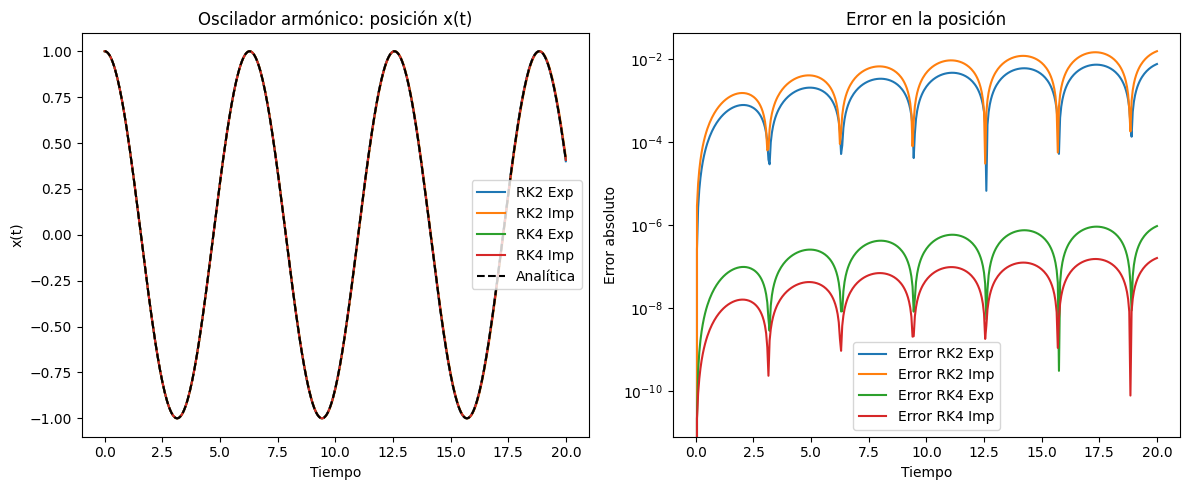

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

# -------------------------
# Definimos el sistema
# -------------------------
def f_osc(t, y, omega=1.0):
    """
    y = [x, v]
    dx/dt = v
    dv/dt = -omega^2 x
    """
    x, v = y
    dxdt = v
    dvdt = -omega**2 * x
    return np.array([dxdt, dvdt])

# -------------------------
# Métodos numéricos
# -------------------------
def rk2_exp(f, t0, y0, h, N, omega):
    t = np.linspace(t0, t0 + N*h, N+1)
    y = np.zeros((N+1, len(y0)))
    y[0] = y0
    for n in range(N):
        k1 = f(t[n], y[n], omega)
        k2 = f(t[n] + h, y[n] + h*k1, omega)
        y[n+1] = y[n] + (h/2)*(k1 + k2)
    return t, y

def rk2_imp(f, t0, y0, h, N, omega, tol=1e-10, max_iter=20):
    t = np.linspace(t0, t0 + N*h, N+1)
    y = np.zeros((N+1, len(y0)))
    y[0] = y0
    for n in range(N):
        k1 = f(t[n], y[n], omega)
        k2 = k1.copy()
        for _ in range(max_iter):
            k2_new = f(t[n] + h, y[n] + h*k2, omega)
            if np.linalg.norm(k2_new - k2) < tol:
                k2 = k2_new
                break
            k2 = k2_new
        y[n+1] = y[n] + (h/2)*(k1 + k2)
    return t, y

def rk4_exp(f, t0, y0, h, N, omega):
    t = np.linspace(t0, t0 + N*h, N+1)
    y = np.zeros((N+1, len(y0)))
    y[0] = y0
    for n in range(N):
        k1 = f(t[n], y[n], omega)
        k2 = f(t[n] + h/2, y[n] + h*k1/2, omega)
        k3 = f(t[n] + h/2, y[n] + h*k2/2, omega)
        k4 = f(t[n] + h, y[n] + h*k3, omega)
        y[n+1] = y[n] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
    return t, y

def rk4_imp(f, t0, y0, h, N, omega, tol=1e-10, max_iter=20):
    # Implementación tipo Gauss-Legendre de 2 etapas (orden 4)
    t = np.linspace(t0, t0 + N*h, N+1)
    y = np.zeros((N+1, len(y0)))
    y[0] = y0

    # Coeficientes del método
    c1 = 0.5 - np.sqrt(3)/6
    c2 = 0.5 + np.sqrt(3)/6
    a11 = 0.25
    a12 = 0.25 - np.sqrt(3)/6
    a21 = 0.25 + np.sqrt(3)/6
    a22 = 0.25
    b1 = 0.5
    b2 = 0.5

    for n in range(N):
        k1 = f(t[n] + c1*h, y[n], omega)
        k2 = f(t[n] + c2*h, y[n], omega)

        for _ in range(max_iter):
            k1_new = f(t[n] + c1*h, y[n] + h*(a11*k1 + a12*k2), omega)
            k2_new = f(t[n] + c2*h, y[n] + h*(a21*k1 + a22*k2), omega)
            if np.linalg.norm(k1_new - k1) < tol and np.linalg.norm(k2_new - k2) < tol:
                k1, k2 = k1_new, k2_new
                break
            k1, k2 = k1_new, k2_new

        y[n+1] = y[n] + h*(b1*k1 + b2*k2)
    return t, y

# -------------------------
# Solución analítica
# -------------------------
def solucion_analitica(t, x0, v0, omega):
    x = x0*np.cos(omega*t) + (v0/omega)*np.sin(omega*t)
    v = -x0*omega*np.sin(omega*t) + v0*np.cos(omega*t)
    return np.array([x, v]).T

# -------------------------
# Parámetros y ejecución
# -------------------------

t0 = 0.0
x0 = 1.0
v0 = 0.0
y0 = np.array([x0, v0])
omega = 1.0
h = 0.05
N = 400

start_time = time.time()
t_rk2e, y_rk2e = rk2_exp(f_osc, t0, y0, h, N, omega)
end_time = time.time()
time_rk2_exp = end_time - start_time
print(f"Tiempo de ejecución RK2 Explícito: {time_rk2_exp:.6f} segundos")

start_time = time.time()
t_rk2i, y_rk2i = rk2_imp(f_osc, t0, y0, h, N, omega)
end_time = time.time()
time_rk2_imp = end_time - start_time
print(f"Tiempo de ejecución RK2 Implícito: {time_rk2_imp:.6f} segundos")

start_time = time.time()
t_rk4e, y_rk4e = rk4_exp(f_osc, t0, y0, h, N, omega)
end_time = time.time()
time_rk4_exp = end_time - start_time
print(f"Tiempo de ejecución RK4 Explícito: {time_rk4_exp:.6f} segundos")

start_time = time.time()
t_rk4i, y_rk4i = rk4_imp(f_osc, t0, y0, h, N, omega)
end_time = time.time()
time_rk4_imp = end_time - start_time
print(f"Tiempo de ejecución RK4 Implícito: {time_rk4_imp:.6f} segundos")


t_ana = np.linspace(t0, t0+N*h, N+1)
y_ana = solucion_analitica(t_ana, x0, v0, omega)

# -------------------------
# Gráficas
# -------------------------
fig, axs = plt.subplots(1,2, figsize=(12,5))

# Posición en el tiempo
axs[0].plot(t_rk2e, y_rk2e[:,0], label="RK2 Exp")
axs[0].plot(t_rk2i, y_rk2i[:,0], label="RK2 Imp")
axs[0].plot(t_rk4e, y_rk4e[:,0], label="RK4 Exp")
axs[0].plot(t_rk4i, y_rk4i[:,0], label="RK4 Imp")
axs[0].plot(t_ana, y_ana[:,0], "k--", label="Analítica")
axs[0].set_title("Oscilador armónico: posición x(t)")
axs[0].set_xlabel("Tiempo")
axs[0].set_ylabel("x(t)")
axs[0].legend()

# Error en la posición
axs[1].semilogy(t_rk2e, np.abs(y_rk2e[:,0]-y_ana[:,0]), label="Error RK2 Exp")
axs[1].semilogy(t_rk2i, np.abs(y_rk2i[:,0]-y_ana[:,0]), label="Error RK2 Imp")
axs[1].semilogy(t_rk4e, np.abs(y_rk4e[:,0]-y_ana[:,0]), label="Error RK4 Exp")
axs[1].semilogy(t_rk4i, np.abs(y_rk4i[:,0]-y_ana[:,0]), label="Error RK4 Imp")
axs[1].set_title("Error en la posición")
axs[1].set_xlabel("Tiempo")
axs[1].set_ylabel("Error absoluto")
axs[1].legend()

plt.tight_layout()
plt.show()

# Regiones de estabilidad 🎇

In [8]:
# -- Decaimiento radiactivo -- 🎀
# Practicamente está diseñado para una EDO lineal.
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, Dropdown


# --funciones de estabilidad-- 🎀
def R_rk2_expl(z):
    return 1 + z + 0.5*z**2

def R_rk2_impl(z):
    return (1 + 0.5*z) / (1 - 0.5*z)

def R_rk4_expl(z):
    return 1 + z + z**2/2 + z**3/6 + z**4/24

def R_rk4_imp(z):
    return (1 + z/2 + z**2/12) / (1 - z/2 + z**2/12)

metodos = {
    "RK2 explícito": R_rk2_expl,
    "RK2 implícito": R_rk2_impl,
    "RK4 explícito": R_rk4_expl,
    "RK4 implícito": R_rk4_imp
}

def plot_stability_regions(lambda_real=-1.0, lambda_imag=0.0, h=1.0):
    # Grid en el plano complejo
    x = np.linspace(-5, 5, 600)
    y = np.linspace(-5, 5, 600)
    X, Y = np.meshgrid(x, y)
    Z = X + 1j*Y

    fig, axs = plt.subplots(2,2, figsize=(12,12))

    for ax, (nombre, R) in zip(axs.ravel(), metodos.items()):
        stability = np.abs(R(Z))

        # -- Fondo coloreado según |R(z)| --
        im = ax.imshow(stability, extent=[-5,5,-5,5], origin="lower",
                       vmin=0, vmax=2, cmap="viridis")

        # -- Contorno donde |R(z)|=1 --
        ax.contour(X, Y, stability, levels=[1], colors="red")

        # -- Punto actual z = h*lambda --
        lam = lambda_real + 1j*lambda_imag
        z = h * lam
        ax.plot(z.real, z.imag, 'ko', markersize=10, label=f"z = {z:.2f}")


        # -- Ejes -
        ax.axhline(0, color="k", lw=0.5)
        ax.axvline(0, color="k", lw=0.5)
        ax.set_title(nombre)
        ax.set_xlabel("Re(z)")
        ax.set_ylabel("Im(z)")

        # -- Numeración de los ejes --
        ax.set_xticks(np.arange(-5, 6, 1))
        ax.set_yticks(np.arange(-5, 6, 1))
        ax.legend()


    plt.tight_layout()
    plt.show()

interact(plot_stability_regions,
         lambda_real=FloatSlider(value=-1.0, min=-5.0, max=5.0, step=0.1, description='Re(λ)'),
         lambda_imag=FloatSlider(value=0.0, min=-5.0, max=5.0, step=0.1, description='Im(λ)'),
         h=FloatSlider(value=1.0, min=0.1, max=5.0, step=0.1, description='h'));

interactive(children=(FloatSlider(value=-1.0, description='Re(λ)', max=5.0, min=-5.0), FloatSlider(value=0.0, …

In [9]:
# -- Caída libre -- 🎀
import numpy as np

# La ecuación de caída libre es un sistema de EDOs de primer orden:
# x' = v
# v' = -g
# La parte homogénea es:
# x' = v
# v' = 0

# La matriz del sistema lineal homogéneo es:
# A = [[0, 1],
#      [0, 0]]

# Eigen valroes de A
A = np.array([[0, 1], [0, 0]])
eigenvalues = np.linalg.eigvals(A)

print(f"Autovalores de la matriz del sistema homogéneo de caída libre: {eigenvalues}")

# Para cualquier paso h, el punto z = h * lambda es:
h = 0.1
z_values = h * eigenvalues

print(f"Para h = {h}, los puntos z = h * λ son: {z_values}")
print("Dado que todos los autovalores son 0, los puntos z siempre estarán en el origen (0,0) en el plano de estabilidad.")
print("El origen está dentro de la región de estabilidad de todos los métodos RK implementados, por lo que son estables para la caída libre.")

Autovalores de la matriz del sistema homogéneo de caída libre: [0. 0.]
Para h = 0.1, los puntos z = h * λ son: [0. 0.]
Dado que todos los autovalores son 0, los puntos z siempre estarán en el origen (0,0) en el plano de estabilidad.
El origen está dentro de la región de estabilidad de todos los métodos RK implementados, por lo que son estables para la caída libre.


In [10]:
# -- Ocsilador armónico -- 🎀
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, Dropdown


# --Funciones de estabilidad-- 🎀
def R_rk2_expl(z):
    return 1 + z + 0.5*z**2

def R_rk2_impl(z):
    return (1 + 0.5*z) / (1 - 0.5*z)

def R_rk4_expl(z):
    return 1 + z + z**2/2 + z**3/6 + z**4/24

def R_rk4_imp(z):
    return (1 + z/2 + z**2/12) / (1 - z/2 + z**2/12)

metodos = {
    "RK2 explícito": R_rk2_expl,
    "RK2 implícito": R_rk2_impl,
    "RK4 explícito": R_rk4_expl,
    "RK4 implícito": R_rk4_imp
}

def plot_stability_regions_oscillator(h=1.0, omega=1.0):
    x = np.linspace(-5, 5, 600)
    y = np.linspace(-5, 5, 600)
    X, Y = np.meshgrid(x, y)
    Z = X + 1j*Y

    fig, axs = plt.subplots(2,2, figsize=(12,12))

    # Calcular autovalores del oscilador armónico
    # Matriz A = [[0, 1], [-omega^2, 0]]
    # Autovalores son lambda = +/- i*omega
    eigenvalues_osc = np.array([1j * omega, -1j * omega])
    z_oscillator = h * eigenvalues_osc


    for ax, (nombre, R) in zip(axs.ravel(), metodos.items()):
        stability = np.abs(R(Z))

        # Fondo coloreado según |R(z)|
        im = ax.imshow(stability, extent=[-5,5,-5,5], origin="lower",
                       vmin=0, vmax=2, cmap="viridis")

        # Contorno donde |R(z)|=1
        ax.contour(X, Y, stability, levels=[1], colors="red")

        # Punto actual z = h*lambda para el oscilador armónico
        ax.plot(z_oscillator.real, z_oscillator.imag, 'wo', markersize=10, label=f"z = h*λ_osc") # Usamos 'wo' para puntos blancos


        ax.axhline(0, color="k", lw=0.5)
        ax.axvline(0, color="k", lw=0.5)
        ax.set_title(nombre)
        ax.set_xlabel("Re(z)")
        ax.set_ylabel("Im(z)")

        ax.set_xticks(np.arange(-5, 6, 1))
        ax.set_yticks(np.arange(-5, 6, 1))
        ax.legend()


    plt.tight_layout()
    plt.show()

interact(plot_stability_regions_oscillator,
         h=FloatSlider(value=1.0, min=0.1, max=5.0, step=0.1, description='h'),
         omega=FloatSlider(value=1.0, min=0.1, max=5.0, step=0.1, description='ω (Oscilador)'));

interactive(children=(FloatSlider(value=1.0, description='h', max=5.0, min=0.1), FloatSlider(value=1.0, descri…

Los puntos que se encuentran en la gráfica representan la región en donde se está evaluando, de manera que si cae por dentro de las regiones representativas (correspondientes a las regiones de estabilidad de cada método), se espera que sea estable en esa zona. De lo contrario, el método no funcionará correctamente.